In [1]:
import numpy as np
import matplotlib.pyplot as plt

import distributions as dist
import diagnostics as diag
import MetropolisHastings as mh
import langevin as lan
import hamiltonian as ham

Text(0.5, 1.0, 'Disjoint Multimodal Gaussian Distribution')

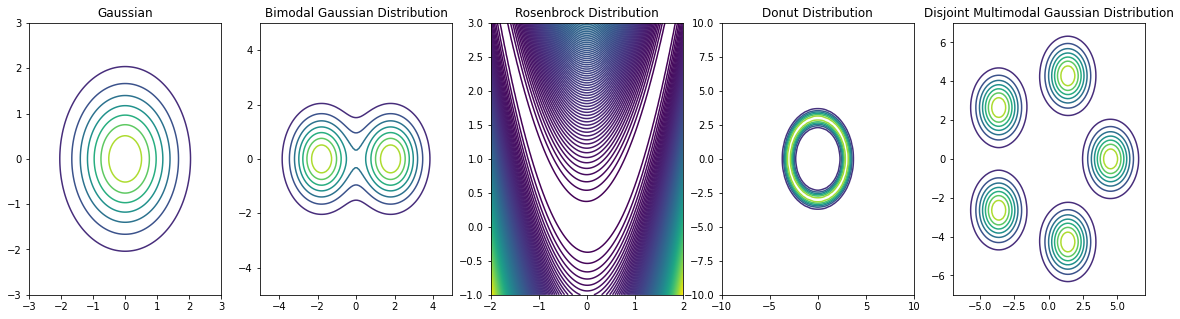

In [2]:
#Test distributions
#####################################################

#Gaussian
gaussian = dist.Gaussian(np.array([0,0]), np.diag([1,1]))

X = np.linspace(-3,3,100)
Y = np.linspace(-3,3,100)
z = [[gaussian([x,y]) for x in X] for y in Y]

plt.figure(figsize=(20,5))
plt.subplot(1,5,1)
plt.contour(X,Y,z)
plt.title('Gaussian')

#Multimodal
double = dist.Multimodal(2,offset=.8)

X = np.linspace(-5,5,100)
Y = np.linspace(-5,5,100)
z = [[double([x,y]) for x in X] for y in Y]

plt.subplot(1,5,2)
plt.contour(X,Y,z)
plt.title('Bimodal Gaussian Distribution')

#Banana
banana = dist.Banana()

X = np.linspace(-2,2,100)
Y = np.linspace(-1,3,100)
z = [[banana([x,y]) for x in X] for y in Y]

plt.subplot(1,5,3)
plt.contour(X,Y,z,200)
plt.title('Rosenbrock Distribution')

#Donut
donut = dist.Donut()

X = np.linspace(-10,10,100)
Y = np.linspace(-10,10,100)
z = [[donut([x,y]) for x in X] for y in Y]

plt.subplot(1,5,4)
plt.contour(X,Y,z)
plt.title('Donut Distribution')

#Multimodal
multimodal = dist.Multimodal(5,offset=3.5)

X = np.linspace(-7,7,100)
Y = np.linspace(-7,7,100)
z = [[multimodal([x,y]) for x in X] for y in Y]

plt.subplot(1,5,5)
plt.contour(X,Y,z)
plt.title('Disjoint Multimodal Gaussian Distribution')

3984
16


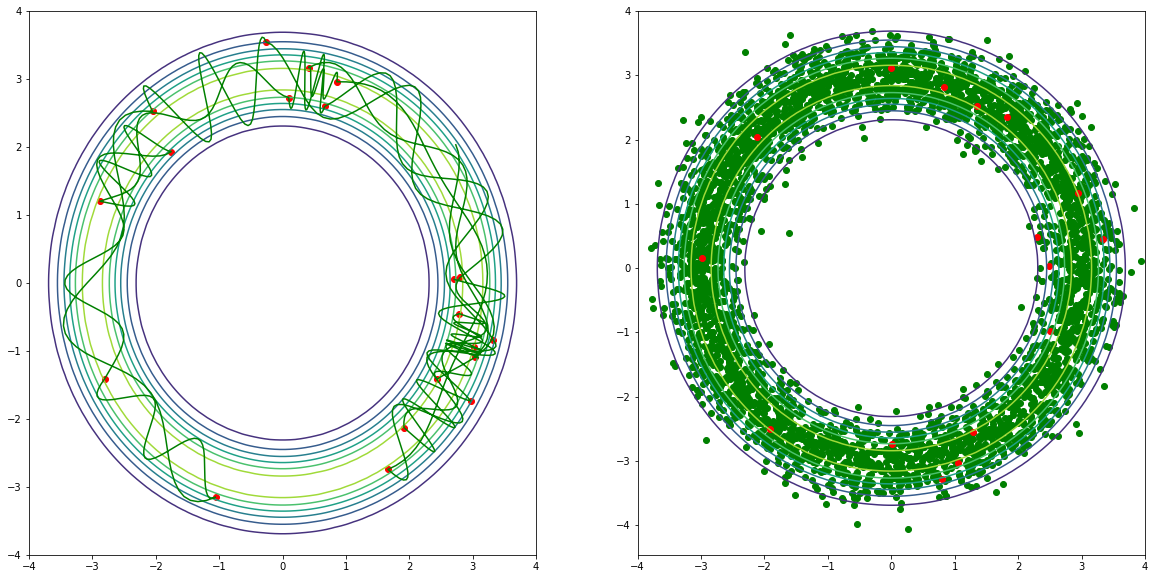

In [43]:
#Test Metropolis Adjusted Langevin
donutham = ham.HamiltonianMonteCarlo(np.array([2,2]), donut, transition=ham.NormalProposal(var=np.diag([.7,.7])), burn=1000, tau=.1)
donutburnham, donutrunham = donutham(5000, all=True)

dh_burn_traj, dh_burn_samples, dh_burn_accepted = donutburnham
dh_traj, dh_samples, dh_accepted, dh_rejected = donutrunham

print(len(dh_accepted))
print(len(dh_rejected))

#Gaussian
X = np.linspace(-4,4,100)
Y = np.linspace(-4,4,100)
z = [[donut([x,y]) for x in X] for y in Y]

plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
plt.contour(X,Y,z)
plt.plot(dh_traj[:1000,0], dh_traj[:1000,1], color='g')
plt.scatter(dh_traj[dh_samples[:20],0], dh_traj[dh_samples[:20],1], color='r')

plt.subplot(1,2,2)
plt.contour(X,Y,z)

plt.scatter(dh_traj[dh_accepted,0], dh_traj[dh_accepted,1], color='g')
plt.scatter(dh_traj[dh_rejected,0], dh_traj[dh_rejected,1], color='r')


/Users/anthonybugatto/Desktop/School/Spring 2022/Baysean Computing/Langevin-Hamiltonian/hamiltonian.py:45: RuntimeWarning: invalid value encountered in log
  return np.log(self.target.grad(q))


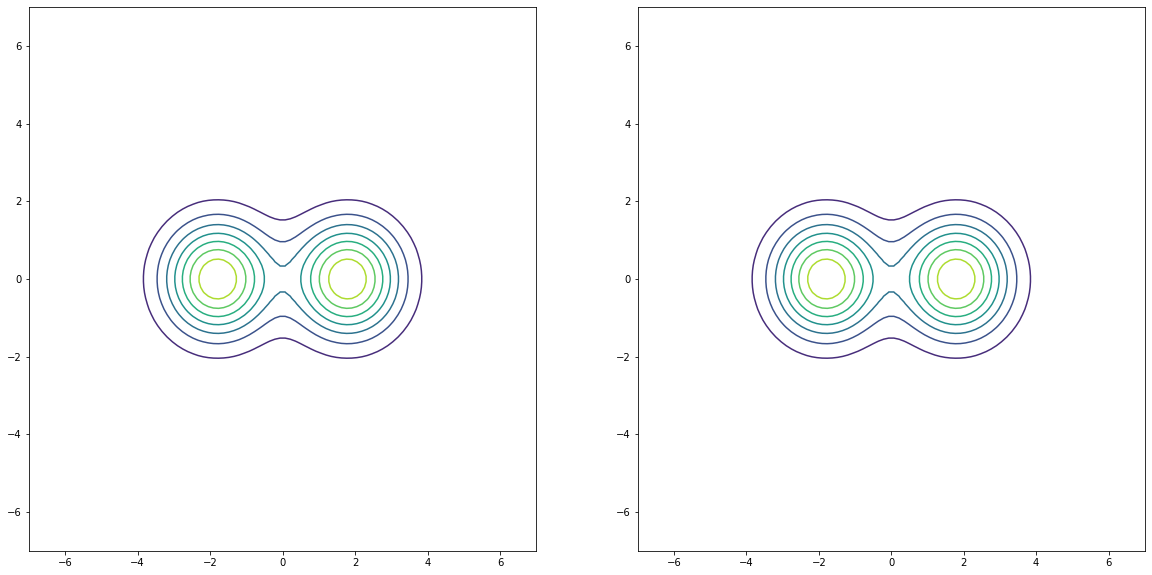

In [49]:
#Test Metropolis Adjusted Langevin
hamm = ham.HamiltonianMonteCarlo(np.array([2,2]), double, transition=ham.NormalProposal(var=np.diag([.7,.7])), burn=1000, tau=.1)
mburnham, mrunham = hamm(2000, all=True)

dh_burn_traj, dh_burn_samples, dh_burn_accepted = mburnham
dh_traj, dh_samples, dh_accepted, dh_rejected = mrunham

#Gaussian
X = np.linspace(-7,7,100)
Y = np.linspace(-7,7,100)
z = [[double([x,y]) for x in X] for y in Y]

plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
plt.contour(X,Y,z)
plt.plot(dh_traj[:1000,0], dh_traj[:1000,1], color='g')
plt.scatter(dh_traj[dh_samples[:20],0], dh_traj[dh_samples[:20],1], color='r')

plt.subplot(1,2,2)
plt.contour(X,Y,z)

plt.scatter(dh_traj[dh_accepted,0], dh_traj[dh_accepted,1], color='g')
plt.scatter(dh_traj[dh_rejected,0], dh_traj[dh_rejected,1], color='r')

7.74710622377341


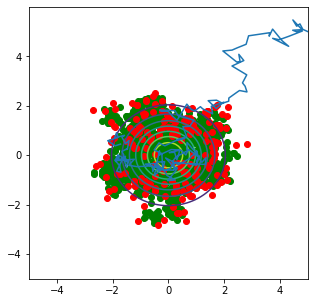

In [28]:
#Test Metropolis Hastings
metropolis = mh.MetropolisHastings(np.array([5,5]), gaussian, burn=200)
burn, samples, accepted, rejected = metropolis(2000, all=True)

#Gaussian
X = np.linspace(-5,5,100)
Y = np.linspace(-5,5,100)
z = [[gaussian([x,y]) for x in X] for y in Y]

plt.figure(figsize=(5,5))
plt.contour(X,Y,z)
plt.plot(burn[:,0], burn[:,1])

plt.scatter(samples[accepted,0], samples[accepted,1], color='g')
plt.scatter(samples[rejected,0], samples[rejected,1], color='r')

#Diagnostics
diagnostic_1 = diag.MonteCarloStandardErrors(samples.shape[0])
diagnostic_1.update(samples)
print(diagnostic_1.error())